# 1. Setup and Load Data

## 1.1 Install Dependencies and Setup

In [1]:
import tensorflow as tf
import os

In [2]:
gpus = tf.config.experimental.list_physical_devices('CPU')
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [3]:
len(gpus)

1

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.2 Remove dodgy images

In [5]:
import cv2
import imghdr

In [8]:
data_dir = '2021Winter-Fluorescence-Histogram-Denoisers'

In [9]:
os.listdir(data_dir)

['2-mycelium_grown', '4-fruiting_body_grown-5-spore_massively_produced']

In [10]:
os.listdir(os.path.join(data_dir, '2-mycelium_grown'))

['CMFG0101_20211214T1144.jpg',
 'CMFG0101_20211214T1145.jpg',
 'CMFG0101_20211214T1602.jpg',
 'CMFG0101_20211215T1000.jpg',
 'CMFG0101_20211215T1120.jpg',
 'CMFG0101_20211217T1000.jpg',
 'CMFG0101_20211217T1200.jpg',
 'CMFG0101_20211217T1400.jpg',
 'CMFG0101_20211218T1000.jpg',
 'CMFG0101_20211218T1200.jpg',
 'CMFG0101_20211218T1400.jpg',
 'CMFG0101_20211219T1000.jpg',
 'CMFG0101_20211219T1200.jpg',
 'CMFG0101_20211219T1400.jpg',
 'CMFG0101_20211220T1000.jpg',
 'CMFG0101_20211220T1200.jpg',
 'CMFG0101_20211220T1400.jpg',
 'CMFG0101_20211221T1000.jpg',
 'CMFG0101_20211221T1200.jpg',
 'CMFG0101_20211221T1400.jpg',
 'CMFG0101_20211222T1000.jpg',
 'CMFG0101_20211222T1200.jpg',
 'CMFG0101_20211222T1400.jpg',
 'CMFG0101_20211223T1000.jpg',
 'CMFG0101_20211223T1200.jpg',
 'CMFG0101_20211223T1400.jpg',
 'CMFG0101_20211224T1000.jpg',
 'CMFG0101_20211224T1200.jpg',
 'CMFG0101_20211224T1400.jpg',
 'CMFG0101_20211225T1000.jpg',
 'CMFG0101_20211225T1200.jpg',
 'CMFG0101_20211226T1000.jpg',
 'CMFG01

In [11]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [12]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [14]:
image_exts[1]

'jpg'

In [15]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

## 1.3 Load Data

In [16]:
import numpy as np
from matplotlib import pyplot as plt

In [17]:
data = tf.keras.utils.image_dataset_from_directory('2021Winter-Fluorescence-Histogram-Denoisers')

Found 286 files belonging to 2 classes.


In [18]:
data_iterator = data.as_numpy_iterator()

In [19]:
batch = data_iterator.next()

In [20]:
len(batch)

2

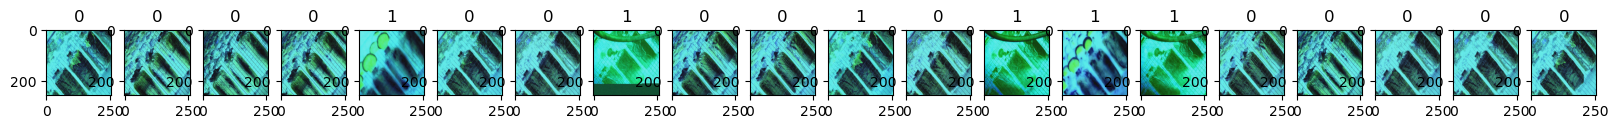

In [21]:
fig, ax = plt.subplots(ncols=20, figsize=(20,20))
for idx, img in enumerate(batch[0][:20]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2. Preprocess Data

## 2.1 Scale Data

In [22]:
data = data.map(lambda x,y: (x/255, y))

In [23]:
data.as_numpy_iterator().next()

(array([[[[0.3162454 , 0.76667434, 0.72819394],
          [0.25825673, 0.7477252 , 0.6841299 ],
          [0.30274203, 0.8290479 , 0.7001953 ],
          ...,
          [0.10095359, 0.30603936, 0.18661535],
          [0.11733302, 0.34013098, 0.16303615],
          [0.06556755, 0.18920037, 0.14232537]],
 
         [[0.2868834 , 0.82707566, 0.74130285],
          [0.2860409 , 0.7541284 , 0.68093216],
          [0.2947304 , 0.74442405, 0.68619025],
          ...,
          [0.11099877, 0.2946423 , 0.18056832],
          [0.10123698, 0.24990043, 0.14531633],
          [0.09888174, 0.17369409, 0.1311734 ]],
 
         [[0.3760072 , 0.86429614, 0.8177275 ],
          [0.28166744, 0.71518075, 0.6510072 ],
          [0.19129519, 0.6626685 , 0.62095207],
          ...,
          [0.09326363, 0.2661688 , 0.15957414],
          [0.11615732, 0.24021523, 0.14074755],
          [0.08275888, 0.13480775, 0.15690105]],
 
         ...,
 
         [[0.31341144, 0.7599265 , 0.7279335 ],
          [0.00237

In [24]:
data.as_numpy_iterator().next()[0].max()

1.0

In [25]:
data.as_numpy_iterator().next()[0].min()

0.0

In [26]:
scaled_iterator = data.as_numpy_iterator()

In [27]:
batch = scaled_iterator.next()

In [28]:
batch[0].max()

1.0

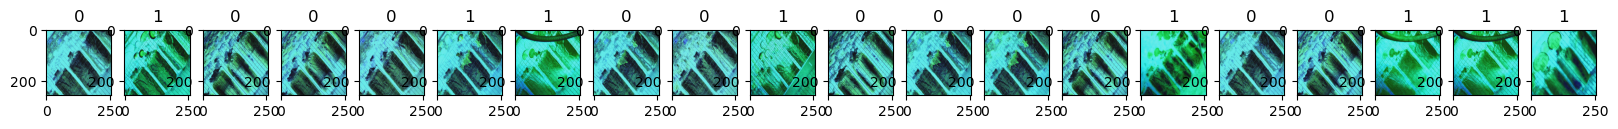

In [29]:
fig, ax = plt.subplots(ncols=20, figsize=(20,20))
for idx, img in enumerate(batch[0][:20]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 2.2 Split Data

In [30]:
len(data)

9

In [31]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [32]:
train_size + val_size + test_size

9

In [33]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [34]:
len(test)

1

# 3. Deep Model

## 3.1 Build Deep Learning Model

In [35]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [37]:
model = Sequential()

In [38]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

## 3.2 Train

In [41]:
logdir='logs'

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
6/6 [==============================] - 13s 2s/step - loss: 1.0912 - accuracy: 0.6094 - val_loss: 0.5683 - val_accuracy: 0.5625
Epoch 2/20
6/6 [==============================] - 12s 2s/step - loss: 0.4114 - accuracy: 0.8698 - val_loss: 0.1790 - val_accuracy: 1.0000
Epoch 3/20
6/6 [==============================] - 12s 2s/step - loss: 0.1023 - accuracy: 0.9948 - val_loss: 0.0458 - val_accuracy: 0.9844
Epoch 4/20
6/6 [==============================] - 12s 2s/step - loss: 0.0377 - accuracy: 0.9792 - val_loss: 0.0087 - val_accuracy: 1.0000
Epoch 5/20
6/6 [==============================] - 12s 2s/step - loss: 0.1244 - accuracy: 0.9531 - val_loss: 0.1341 - val_accuracy: 0.9375
Epoch 6/20
6/6 [==============================] - 11s 1s/step - loss: 0.2602 - accuracy: 0.8802 - val_loss: 0.0261 - val_accuracy: 0.9844
Epoch 7/20
6/6 [==============================] - 11s 1s/step - loss: 0.2665 - accuracy: 0.9167 - val_loss: 0.1785 - val_accuracy: 0.9375
Epoch 8/20
6/6 [==================

## 3.3 Plot Performance

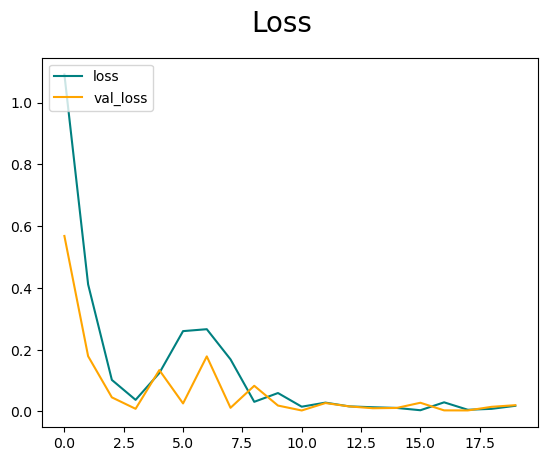

In [44]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

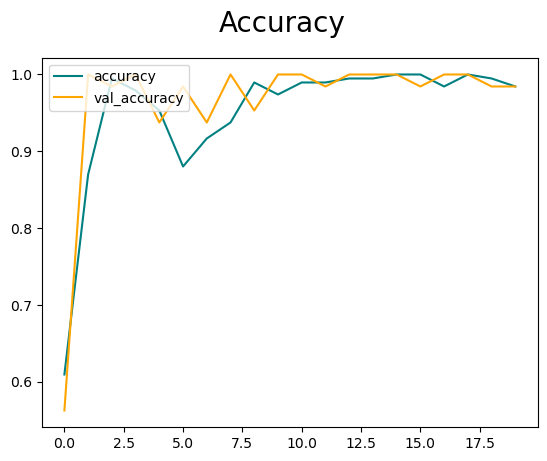

In [45]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 4. Evaluate Performance

## 4.1 Evaluate

In [46]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [47]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [48]:
len(test)

1

In [49]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 373ms/step


In [50]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


## 4.2 Test

In [51]:
import cv2

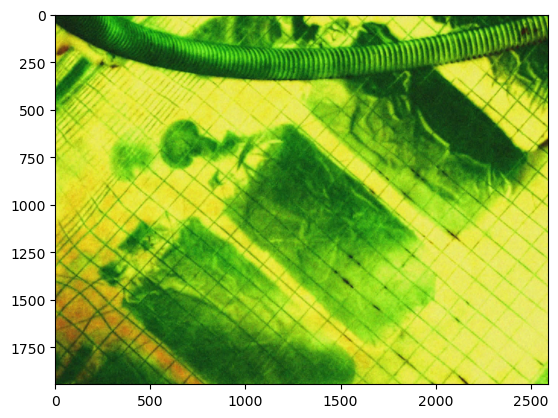

In [66]:
# img = cv2.imread('2021Winter-Fluorescence/2-mycelium_grown/CMFG0101_20211227T1200.jpg')
img = cv2.imread('2021Winter-Fluorescence-Histogram-Denoisers/4-fruiting_body_grown-5-spore_massively_produced/CMFG0101_20220304T1000.jpg')
plt.imshow(img)
plt.show()

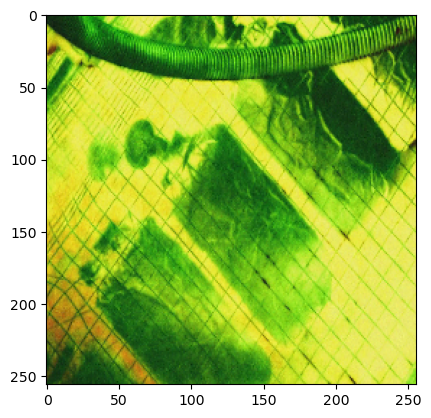

In [67]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [68]:
resize

<tf.Tensor: shape=(256, 256, 3), dtype=float32, numpy=
array([[[ 20.121094 ,  30.672852 ,  26.658203 ],
        [ 26.299805 ,  49.69043  ,  17.001953 ],
        [ 20.703125 ,  50.40625  ,  22.59375  ],
        ...,
        [ 31.234375 , 107.234375 ,  25.9375   ],
        [ 96.791016 , 186.75684  ,  26.006836 ],
        [ 22.726562 , 114.46582  ,  14.1484375]],

       [[ 19.21875  ,  41.6084   ,  21.500977 ],
        [ 21.862305 ,  43.583984 ,  20.140625 ],
        [ 18.78125  ,  46.78125  ,  16.801758 ],
        ...,
        [ 22.208984 , 101.990234 ,  18.990234 ],
        [127.768555 , 211.87793  ,  25.65918  ],
        [ 57.510742 , 151.3086   ,  19.760742 ]],

       [[ 20.449219 ,  46.176758 ,  23.768555 ],
        [ 19.939453 ,  39.939453 ,  20.939453 ],
        [ 22.65625  ,  45.075195 ,  18.90918  ],
        ...,
        [ 26.013672 ,  99.28223  ,  22.982422 ],
        [110.76367  , 185.05566  ,  21.570312 ],
        [105.140625 , 182.69238  ,  23.567383 ]],

       ...,

     

In [69]:
resize.shape

TensorShape([256, 256, 3])

In [70]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 65ms/step


In [71]:
yhat

array([[0.9319291]], dtype=float32)

In [72]:
if yhat > 0.5:
    print('Predicted class is {}'.format(os.listdir(data_dir)[1]))
else:
    print('Predicted class is {}'.format(os.listdir(data_dir)[0]))

Predicted class is 4-fruiting_body_grown-5-spore_massively_produced


# 5. Save the Model

## 5.1 Save the Model

In [74]:
model.save(os.path.join('models', 'lingzhimodel-Composite_Method.h5'))

In [75]:
os.path.join('models', 'lingzhimodel-Composite_Method.h5')

'models\\lingzhimodel-Composite_Method.h5'

In [11]:
from tensorflow.keras.models import load_model
import os

In [12]:
new_model = load_model(os.path.join('models', 'lingzhimodel-Composite_Method.h5'))

## 5.2 Test

In [25]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf

### 5.2.1 Check is mycelium_grown

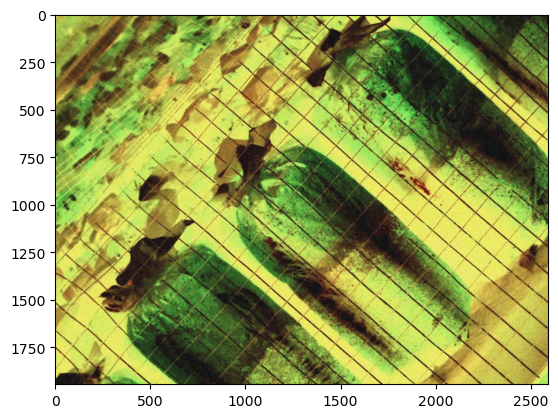

In [27]:
# img = cv2.imread('2021Winter-Fluorescence/2-mycelium_grown/CMFG0101_20211227T1200.jpg')
img = cv2.imread('datasets-composite_method/test1/mycelium_grown.CMFG0101_20211225T1200.jpg.jpg')
plt.imshow(img)
plt.show()

In [28]:
import tensorflow as tf

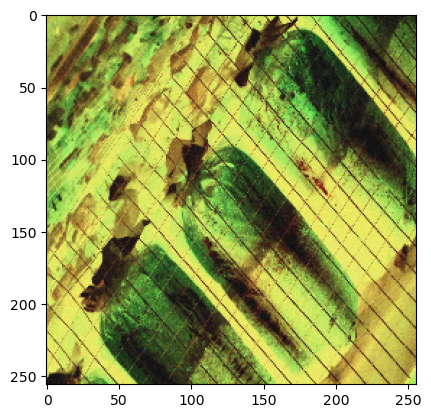

In [29]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [30]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 87ms/step


In [31]:
data_dir = '2021Winter-Fluorescence-Histogram-Denoisers'
os.listdir(data_dir)

['2-mycelium_grown', '4-fruiting_body_grown-5-spore_massively_produced']

In [32]:
if yhatnew > 0.5:
    print('Predicted class is {}'.format(os.listdir(data_dir)[1]))
else:
    print('Predicted class is {}'.format(os.listdir(data_dir)[0]))

Predicted class is 2-mycelium_grown


### 5.2.2 Check is fruiting_body_grown-&-spore_massively_produced

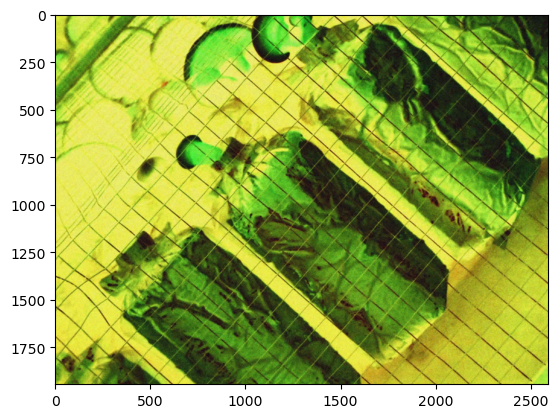

In [37]:
# img = cv2.imread('2021Winter-Fluorescence/2-mycelium_grown/CMFG0101_20211227T1200.jpg')
img_fr = cv2.imread('datasets-composite_method/test1/fruiting_body_grown-spore_massively_produced.CMFG0101_20220206T1200.jpg.jpg')
plt.imshow(img_fr)
plt.show()

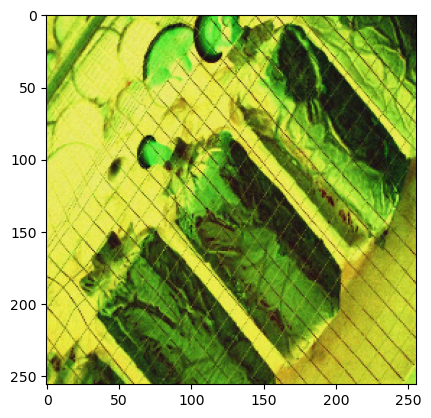

In [38]:
resize_fr = tf.image.resize(img_fr, (256,256))
plt.imshow(resize_fr.numpy().astype(int))
plt.show()

In [39]:
yhatnew_fr = new_model.predict(np.expand_dims(resize_fr/255, 0))

1/1 [==============================] - 0s 104ms/step


In [40]:
if yhatnew_fr > 0.5:
    print('Predicted class is {}'.format(os.listdir(data_dir)[1]))
else:
    print('Predicted class is {}'.format(os.listdir(data_dir)[0]))

Predicted class is 4-fruiting_body_grown-5-spore_massively_produced
